# Fifty One and Pytorch Installation

In [ ]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 26.2 MB/s 
     |████████████████████████████████| 226 kB 67.5 MB/s 
     |████████████████████████████████| 57 kB 7.6 MB/s 
     |████████████████████████████████| 108 kB 70.9 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 192 kB 81.3 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 63 kB 3.4 MB/s 
     |████████████████████████████████| 37.8 MB 1.1 MB/s 
     |████████████████████████████████| 132 kB 57.6 MB/s 
     |████████████████████████████████| 564 kB 79.7 MB/s 
     |████████████████████████████████| 133 kB 84.0 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 202 kB 86.4 MB/s 
     |████████████████████████████████| 

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import torch
import torchvision

# Load Model

In [ ]:
# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


  0%|          | 0.00/136M [00:00<?, ?B/s]

Model ready


# Load Datasets

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="evaluate-detections-tutorial",
)
dataset.persistent = True

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 759.6Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 759.6Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [8.4s elapsed, 0s remaining, 599.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [8.4s elapsed, 0s remaining, 599.1Mb/s]       


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [28.3s elapsed, 0s remaining, 193.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [28.3s elapsed, 0s remaining, 193.7 samples/s]      


Dataset 'evaluate-detections-tutorial' created


INFO:fiftyone.zoo.datasets:Dataset 'evaluate-detections-tutorial' created


In [ ]:
voc_dataset = foz.load_zoo_dataset(
    "voc-2012", 
    split="validation",
    dataset_name="voc-analysis",)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 88.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 88.0 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [19.3s elapsed, 0s remaining, 303.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [19.3s elapsed, 0s remaining, 303.7 samples/s]      


Dataset 'voc-analysis' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-analysis' created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


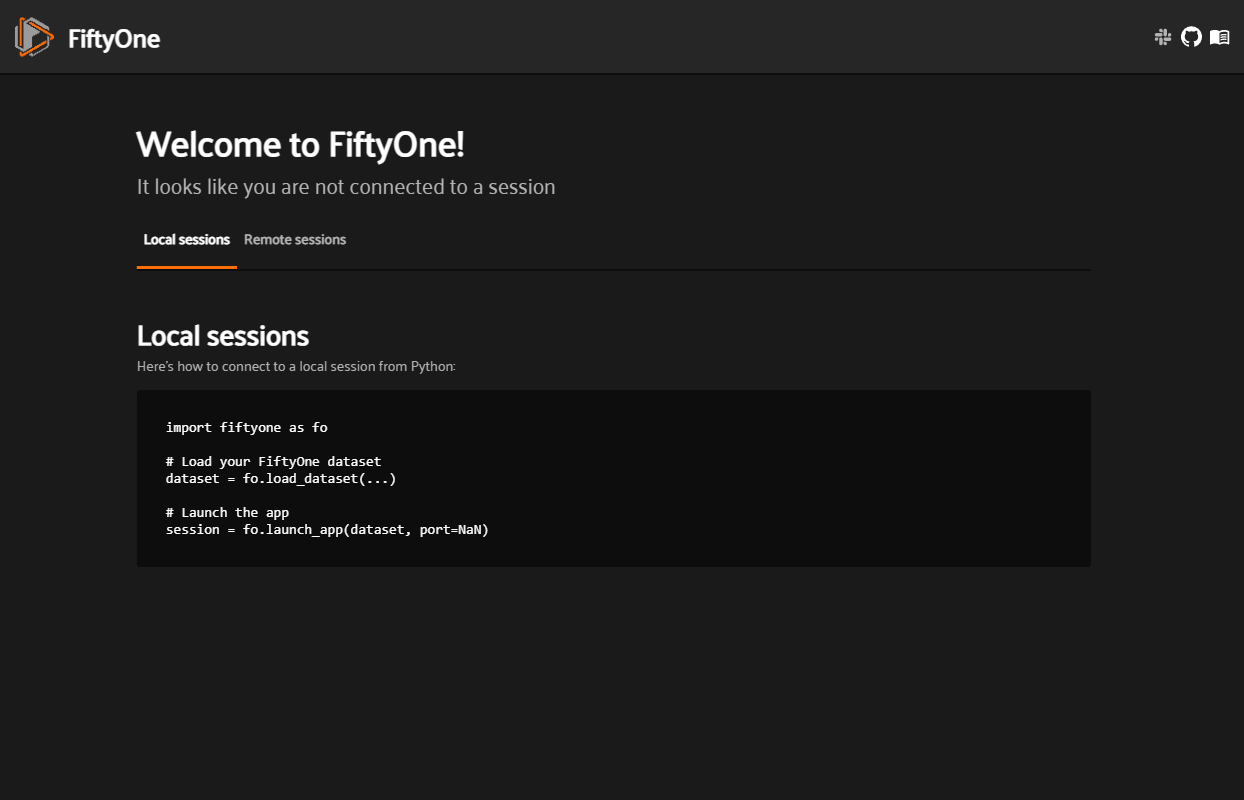

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


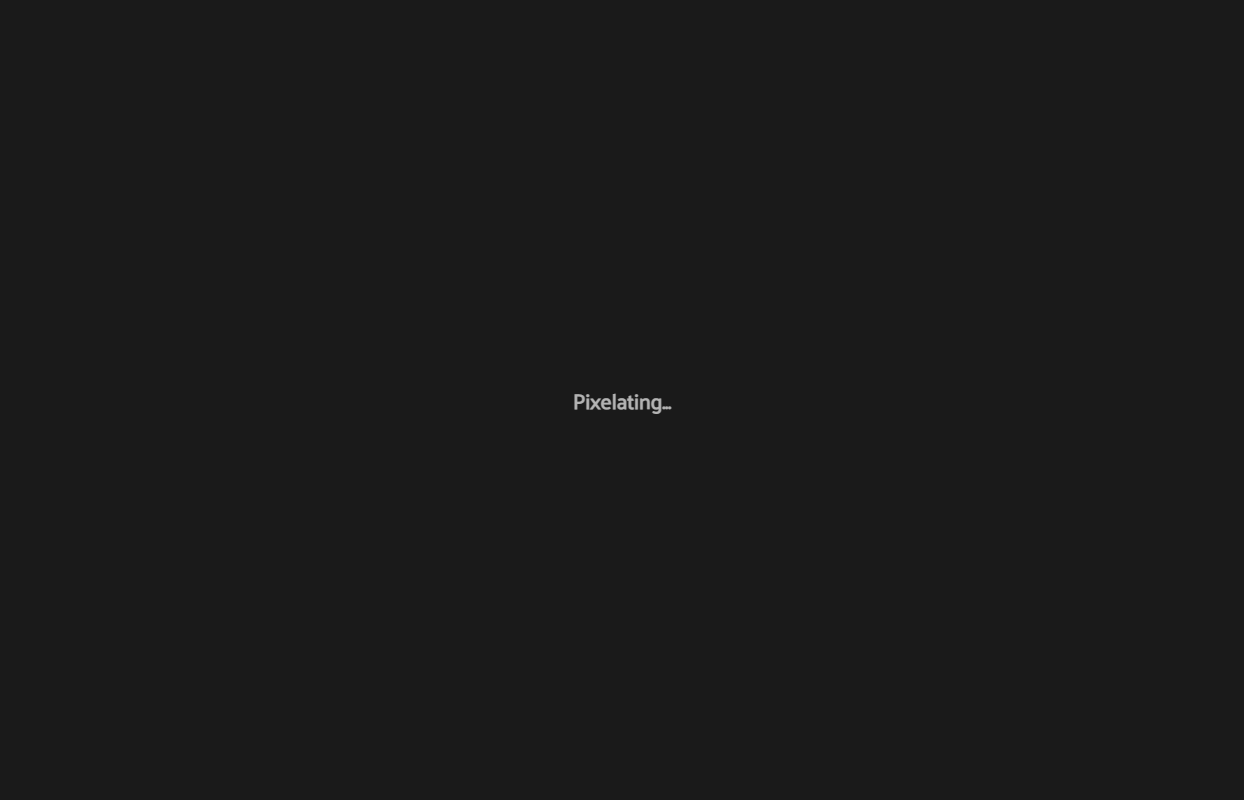

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(voc_dataset)

# Prediction

In [ ]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

classes = dataset.default_classes
with fo.ProgressBar() as pb:
    for sample in pb(voc_dataset):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["predictions_voc"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 5823/5823 [13.5m elapsed, 0s remaining, 7.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [13.5m elapsed, 0s remaining, 7.6 samples/s]      


Finished adding predictions


# Confidence Threshold

In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.5
high_conf_view = voc_dataset.filter_labels("predictions_voc", F("confidence") > 0.5, only_matches=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


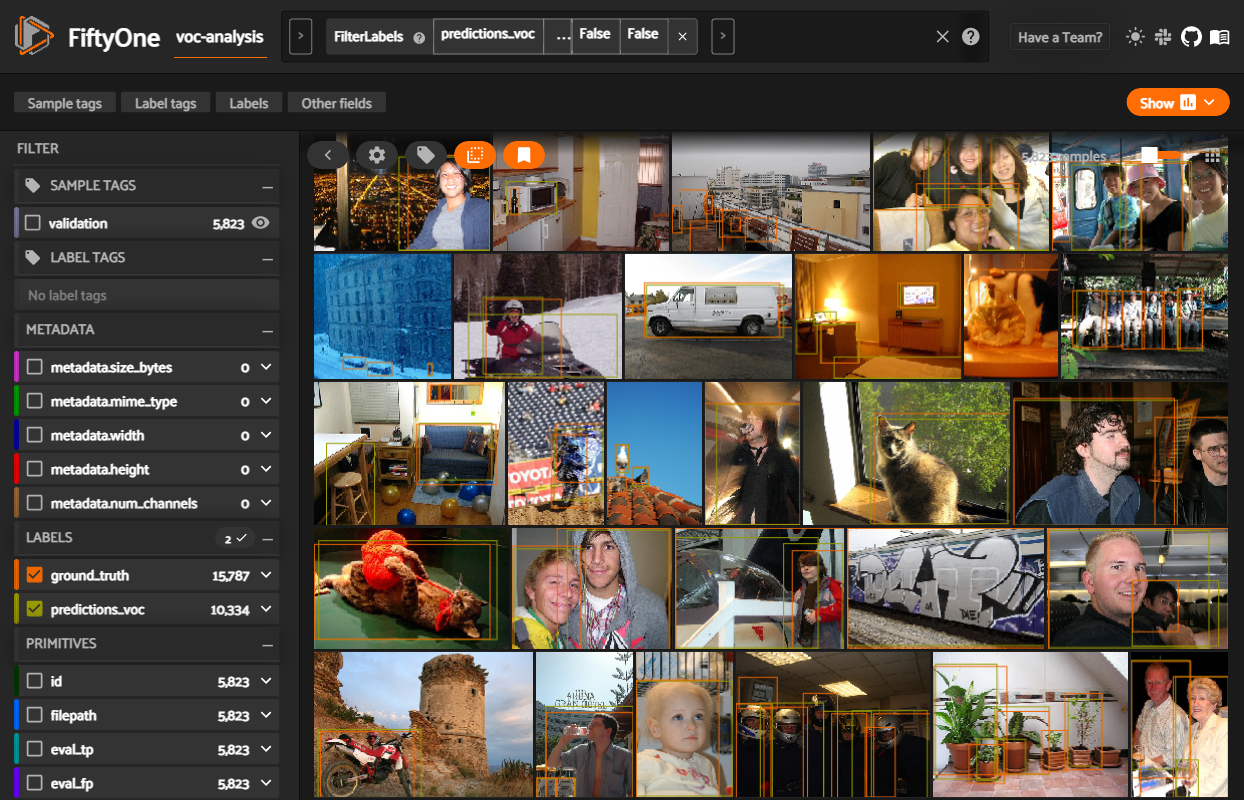

<IPython.core.display.Javascript object>

In [ ]:
session.view = high_conf_view

# Evaluation

In [ ]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "predictions_voc",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 88.1 samples/s]        


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 88.1 samples/s]        


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [36.5s elapsed, 0s remaining, 138.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [36.5s elapsed, 0s remaining, 138.9 samples/s]      


In [ ]:
ious_sum = 0
for i in range(len(results.ious)):
  if results.ious[i] != None:
    ious_sum += results.ious[i]
ious_sum = ious_sum/len(results.ious)
print(ious_sum)

0.32307817463244126


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

               precision    recall  f1-score   support

       person       0.93      0.61      0.74      5110
          car       0.95      0.45      0.61      1173
        chair       0.84      0.34      0.49      1449
         book       0.00      0.00      0.00         0
       bottle       0.91      0.21      0.34       733
          cup       0.00      0.00      0.00         0
 dining table       0.00      0.00      0.00         0
traffic light       0.00      0.00      0.00         0
         bowl       0.00      0.00      0.00         0
      handbag       0.00      0.00      0.00         0

    micro avg       0.84      0.51      0.63      8465
    macro avg       0.36      0.16      0.22      8465
 weighted avg       0.92      0.51      0.64      8465



In [ ]:
print(results.mAP())

0.2727172097365697


In [ ]:
eval_view = voc_dataset.load_evaluation_view("eval")
print(eval_view)

Dataset:     voc-analysis
Media type:  image
Num samples: 5823
Sample fields:
    id:              fiftyone.core.fields.ObjectIdField
    filepath:        fiftyone.core.fields.StringField
    tags:            fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_voc: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:         fiftyone.core.fields.IntField
    eval_fp:         fiftyone.core.fields.IntField
    eval_fn:         fiftyone.core.fields.IntField
View stages:
    1. FilterLabels(field='predictions_voc', filter={'$gt': ['$$this.confidence', 0.5]}, only_matches=False, trajectories=False)


In [ ]:
eval_patches = voc_dataset.to_evaluation_patches("eval")
print(eval_patches)

Dataset:     voc-analysis
Media type:  image
Num patches: 1150464
Patch fields:
    id:              fiftyone.core.fields.ObjectIdField
    sample_id:       fiftyone.core.fields.ObjectIdField
    filepath:        fiftyone.core.fields.StringField
    tags:            fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_voc: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:           fiftyone.core.fields.BooleanField
    type:            fiftyone.core.fields.StringField
    iou:             fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


In [ ]:
session.view = eval_patches